# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
!pip install -q scikit-learn==1.7.0 yellowbrick==1.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 53.2 MB/s eta 0:00:00


In [2]:
!pip install umap-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from umap.umap_ import UMAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [3]:
import pandas as pd

url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df_original = df.copy()
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [6]:
df_kategorikal = df.select_dtypes(include=['object'])
print(df_kategorikal)

     TransactionID AccountID      TransactionDate TransactionType  \
0         TX000001   AC00128  2023-04-11 16:29:14           Debit   
1         TX000002   AC00455  2023-06-27 16:44:19           Debit   
2         TX000003   AC00019  2023-07-10 18:16:08           Debit   
3         TX000004   AC00070  2023-05-05 16:32:11           Debit   
4         TX000005   AC00411  2023-10-16 17:51:24          Credit   
...            ...       ...                  ...             ...   
2532      TX001046   AC00474  2023-05-01 16:23:40           Debit   
2533      TX001484   AC00198  2023-06-23 17:38:26           Debit   
2534      TX000200   AC00358  2023-07-31 16:25:26           Debit   
2535      TX000592   AC00057  2023-05-15 16:19:14          Credit   
2536      TX000026   AC00041  2023-10-20 17:53:13          Credit   

              Location DeviceID      IP Address MerchantID Channel  \
0            San Diego  D000380  162.198.218.92       M015     ATM   
1              Houston  D000051

In [7]:
df_numerik = df.select_dtypes(include=['int'])
print(df_numerik)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2537 rows x 0 columns]


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

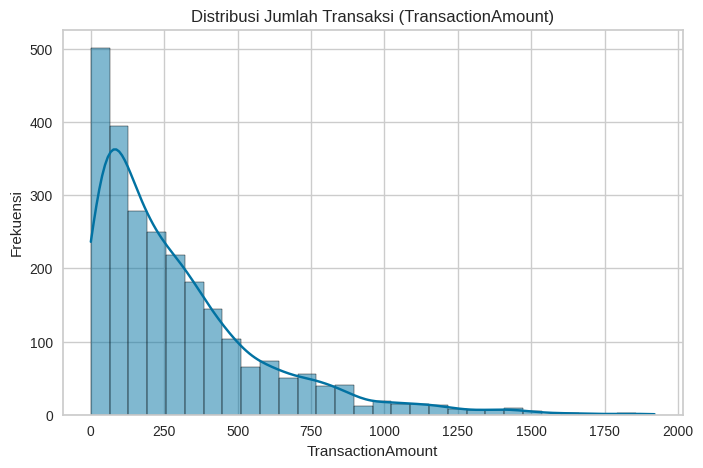

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kolom Date ke datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', format='%d-%b-%y')

# Cek distribusi data numerik (Amount)
plt.figure(figsize=(8, 5))
sns.histplot(df['TransactionAmount'], bins=30, kde=True)
plt.title("Distribusi Jumlah Transaksi (TransactionAmount)")
plt.xlabel("TransactionAmount")
plt.ylabel("Frekuensi")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

# 1) copy dataset asli (df) agar aman
df_prep = df.copy()

# 2) cari kolom numerik & kategorikal
numeric_features = df_prep.select_dtypes(include=[float, int, 'number']).columns.tolist()
categorical_features = df_prep.select_dtypes(include=['object','category']).columns.tolist()

# 3) imputasi sederhana (numeric -> median, categorical -> mode)
for c in numeric_features:
    if df_prep[c].isnull().any():
        df_prep[c] = df_prep[c].fillna(df_prep[c].median())

for c in categorical_features:
    if df_prep[c].isnull().any():
        df_prep[c] = df_prep[c].fillna(df_prep[c].mode().iloc[0])

# 4) scale numeric features -> hasilnya disimpan di df_scaled
scaler = StandardScaler()
if numeric_features:
    scaled_arr = scaler.fit_transform(df_prep[numeric_features])
    df_scaled = pd.DataFrame(scaled_arr, columns=numeric_features, index=df_prep.index)
else:
    # jika tidak ada numeric, buat DataFrame kosong agar cell EDA tidak crash
    df_scaled = pd.DataFrame(index=df_prep.index)

# optional: simpan scaler untuk inverse di tahap selanjutnya
import joblib
joblib.dump(scaler, 'scaler_clustering.h5')

['scaler_clustering.h5']

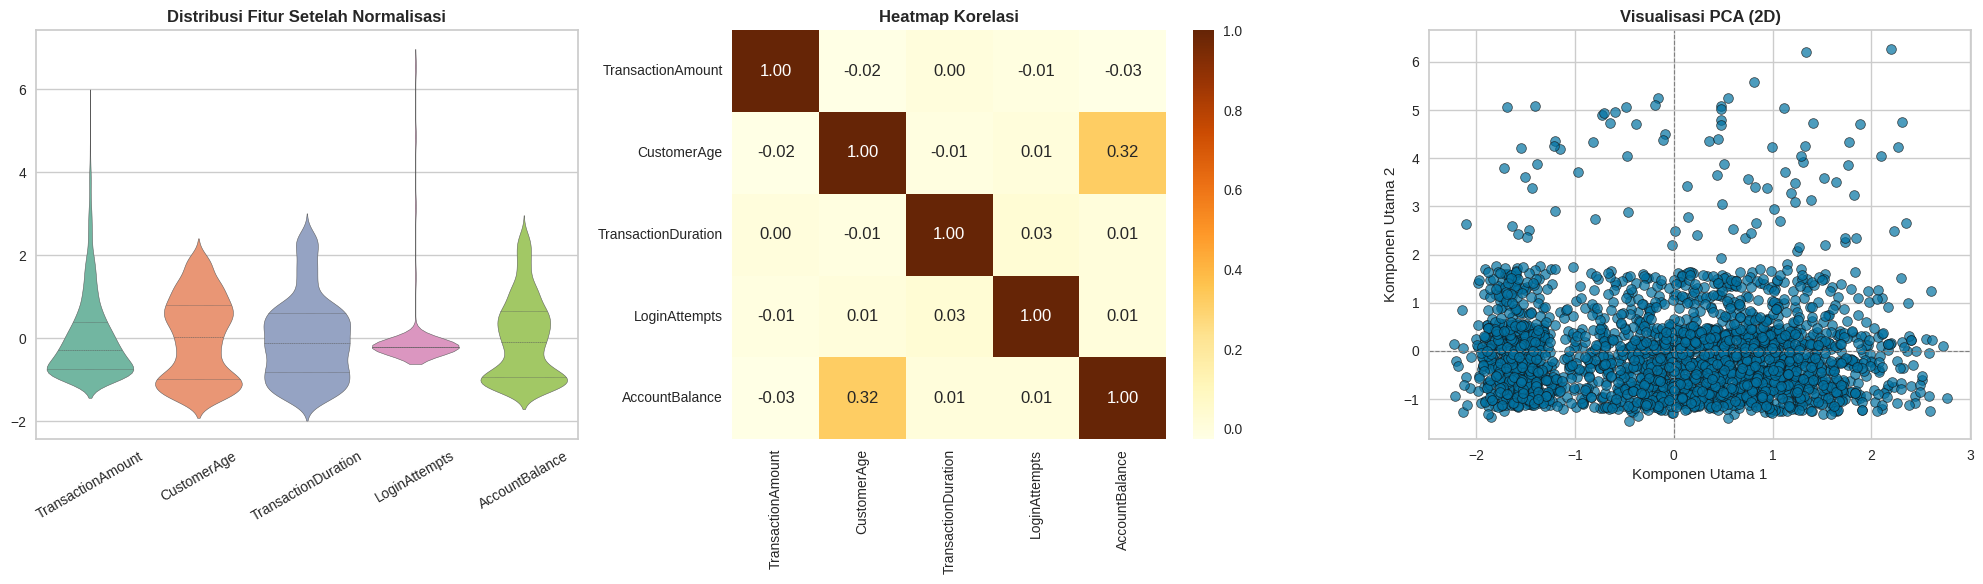

/tmp/ipython-input-820104443.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="pastel")
/tmp/ipython-input-820104443.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[df[col].isin(top_vals)][col], ax=axes[i], palette="pastel")
/tmp/ipython-input-820104443.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[df[col].isin(top_vals)][col], ax=axes[i], palette="pastel")
/tmp/ipython-input-820104443.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

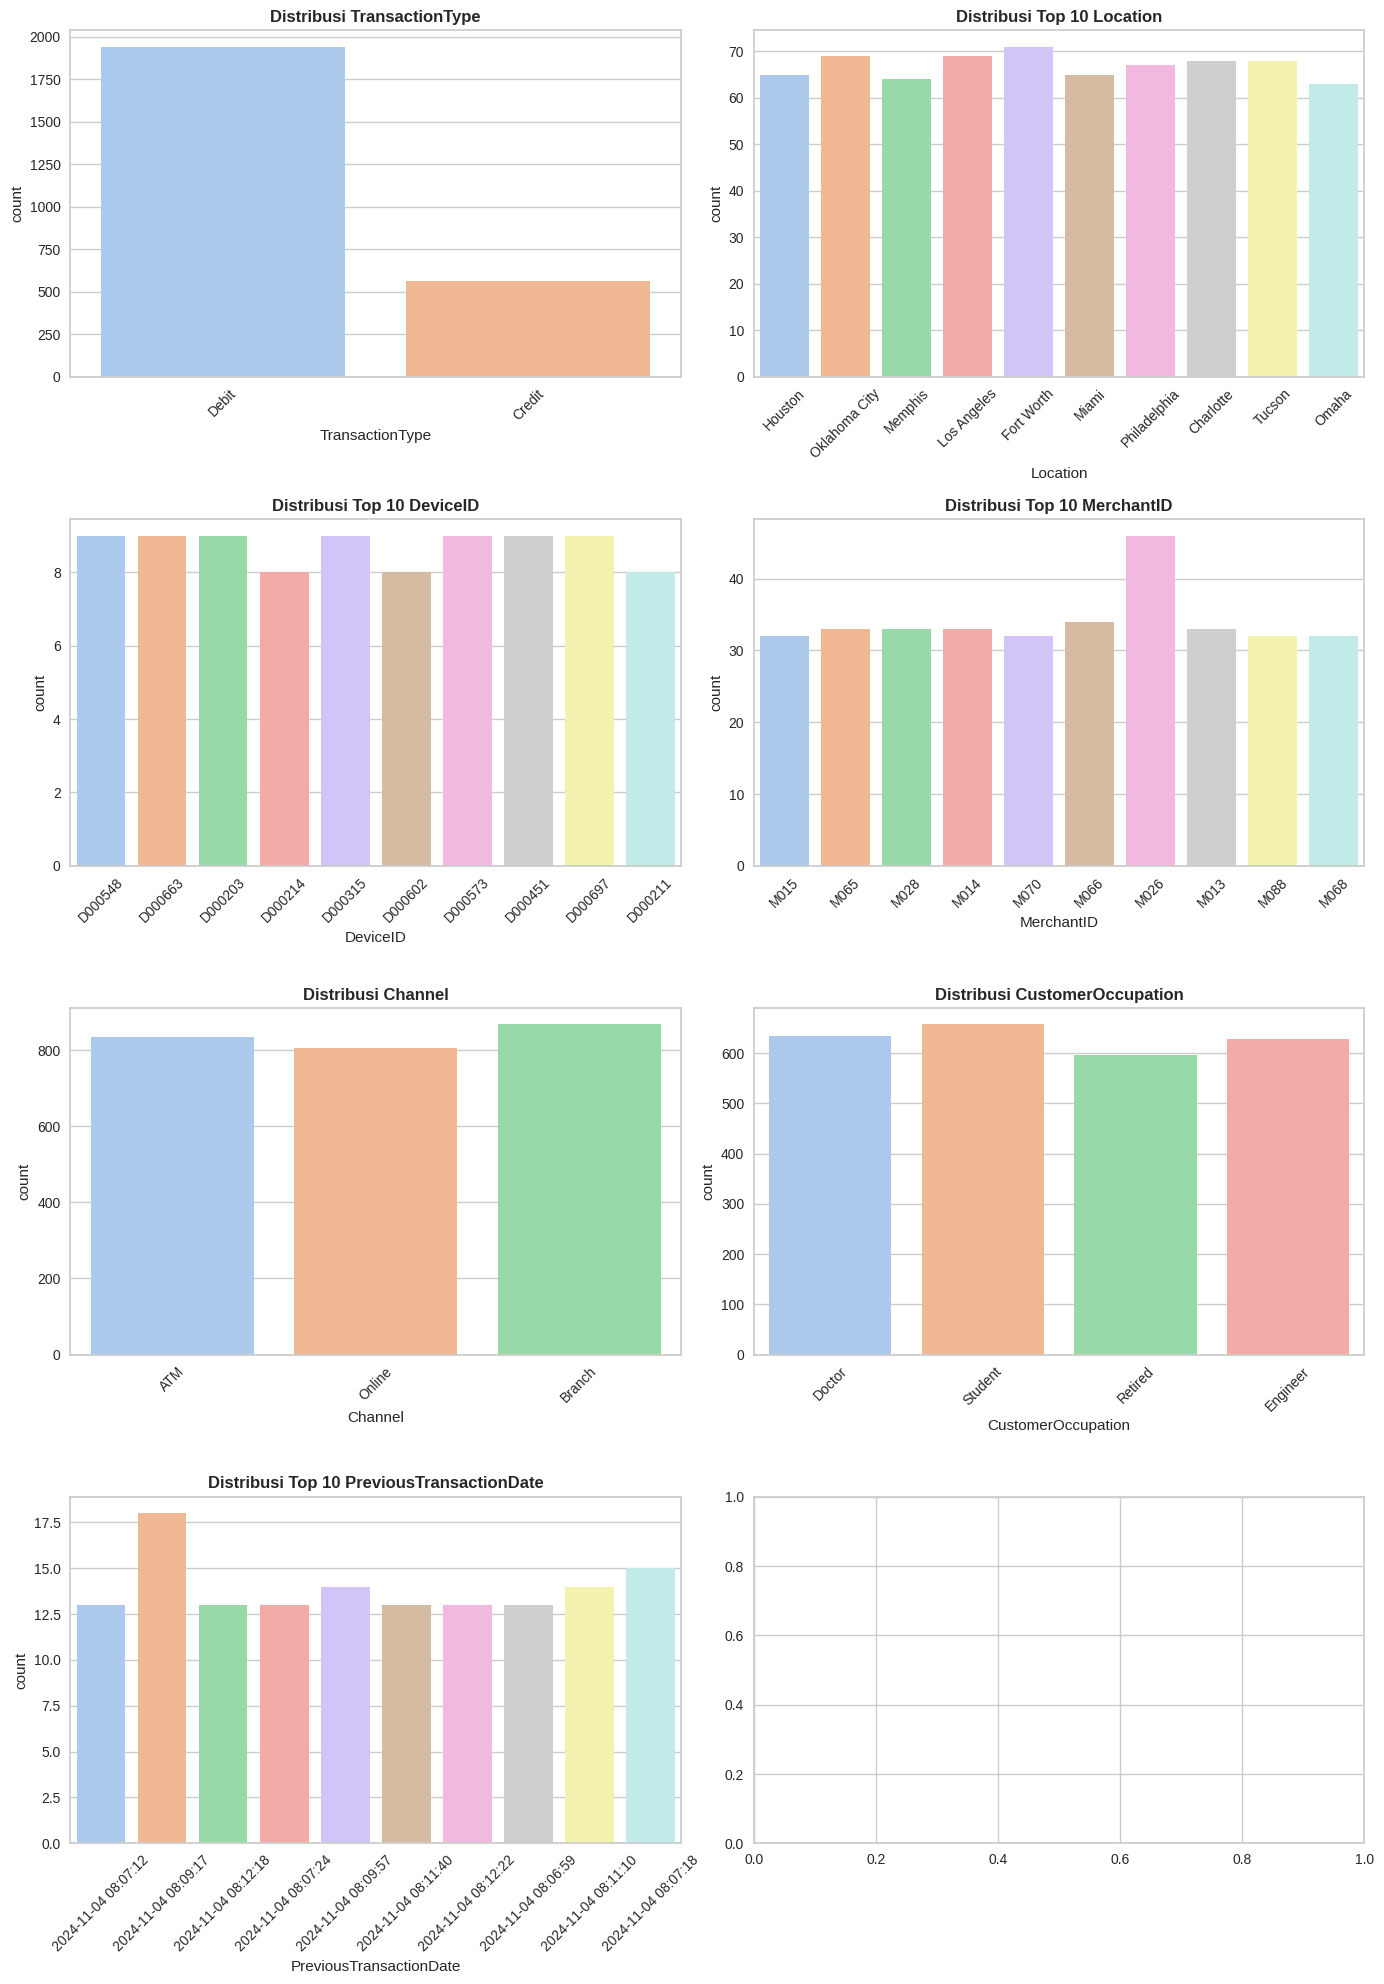

In [10]:
# 1. Plot distribusi numerik (violinplot), Heatmap korelasi, dan PCA scatter
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1A. Distribusi fitur numerik (Violinplot)
sns.violinplot(data=df_scaled, palette="Set2", inner="quartile", ax=axes[0])
axes[0].set_title("Distribusi Fitur Setelah Normalisasi", fontsize=12, weight="bold")
axes[0].tick_params(axis='x', rotation=30)

# 1B. Heatmap korelasi
sns.heatmap(df_scaled.corr(), annot=True, cmap="YlOrBr", fmt=".2f", cbar=True, ax=axes[1])
axes[1].set_title("Heatmap Korelasi", fontsize=12, weight="bold")

# 1C. PCA Scatter
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], alpha=0.7, edgecolor="k", ax=axes[2])
axes[2].set_title("Visualisasi PCA (2D)", fontsize=12, weight="bold")
axes[2].set_xlabel("Komponen Utama 1")
axes[2].set_ylabel("Komponen Utama 2")
axes[2].axhline(0, color="gray", linestyle="--", linewidth=0.8)
axes[2].axvline(0, color="gray", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()


# 2. Plot distribusi fitur kategorikal (exclude kolom ID unik)
if len(categorical_features) > 0:
    exclude_cols = ['TransactionID', 'AccountID', 'TransactionDate', 'IP Address']
    plot_cats = [c for c in categorical_features if c not in exclude_cols]

    if len(plot_cats) > 0:
        n_cols = 2
        n_rows = (len(plot_cats) + 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
        axes = axes.flatten()

        for i, col in enumerate(plot_cats):
            if df[col].nunique() > 15:
                # tampilkan top 10 kategori
                top_vals = df[col].value_counts().nlargest(10).index
                sns.countplot(x=df[df[col].isin(top_vals)][col], ax=axes[i], palette="pastel")
                axes[i].set_title(f"Distribusi Top 10 {col}", fontsize=12, weight="bold")
            else:
                sns.countplot(x=df[col], ax=axes[i], palette="pastel")
                axes[i].set_title(f"Distribusi {col}", fontsize=12, weight="bold")

            axes[i].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()


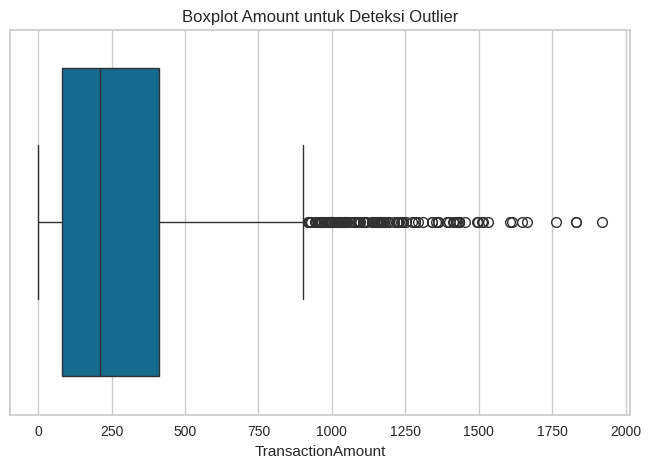

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TransactionAmount'])
plt.title("Boxplot Amount untuk Deteksi Outlier")
plt.show()

/tmp/ipython-input-3408803189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='TransactionType', y='TransactionAmount', data=total_spending, palette='viridis')


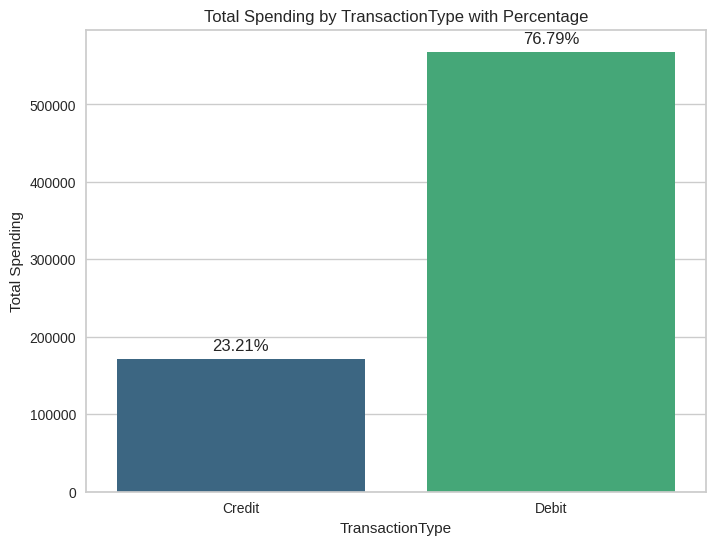

In [12]:
total_spending = df.groupby('TransactionType')['TransactionAmount'].sum().reset_index()
total_spending['Percentage'] = (total_spending['TransactionAmount'] / total_spending['TransactionAmount'].sum()) * 100
plt.figure(figsize=(8, 6))

plot = sns.barplot(x='TransactionType', y='TransactionAmount', data=total_spending, palette='viridis')
for p, perc in zip(plot.patches, total_spending['Percentage']):
    plot.annotate(f'{perc:.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
textcoords='offset points')
plt.title('Total Spending by TransactionType with Percentage')
plt.xlabel('TransactionType')
plt.ylabel('Total Spending')
plt.show()

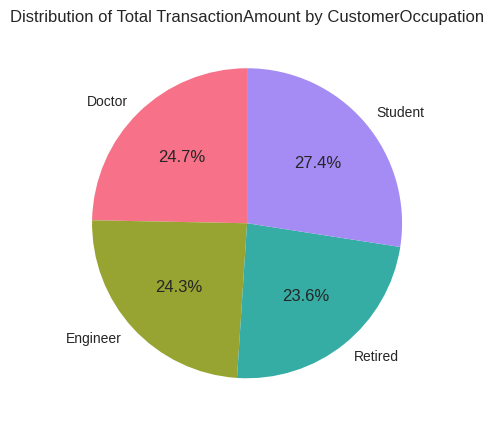

In [13]:
card_type_totals = df.groupby('CustomerOccupation')['TransactionAmount'].sum()
plt.figure(figsize=(5, 6))
bright_palette = sns.color_palette("husl", len(card_type_totals))
plt.pie(card_type_totals, labels=card_type_totals.index, autopct='%1.1f%%', startangle=90, colors=bright_palette)
plt.title('Distribution of Total TransactionAmount by CustomerOccupation')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [14]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplikasi data
duplicate_data = df.duplicated().sum()

print("missing values:\n", missing_values)
print("\nJumlah data duplikat:", duplicate_data)

missing values:
 TransactionID                29
AccountID                    21
TransactionAmount            26
TransactionDate            2537
TransactionType              30
Location                     30
DeviceID                     30
IP Address                   20
MerchantID                   23
Channel                      27
CustomerAge                  18
CustomerOccupation           23
TransactionDuration          26
LoginAttempts                21
AccountBalance               27
PreviousTransactionDate      24
dtype: int64

Jumlah data duplikat: 21


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
# df.dropna(inplace=True)
# print("Here the missing values after cleaning :")
# print(df.isnull().sum())
# print("\nJumlah data duplikat:", duplicate_data)

In [17]:
# 1. Hapus duplikat
df = df.drop_duplicates()
print("Jumlah baris setelah hapus duplikat:", df.shape)

# 2. Pastikan kolom tanggal sudah diubah ke datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

# 3. Identifikasi kolom
numeric_cols = [
    'TransactionAmount', 'CustomerAge', 'TransactionDuration',
    'LoginAttempts', 'AccountBalance'
]

categorical_cols = [
    'TransactionID', 'AccountID', 'TransactionType', 'Location',
    'DeviceID', 'IP Address', 'MerchantID', 'Channel',
    'CustomerOccupation'
]

datetime_cols = [
    'TransactionDate', 'PreviousTransactionDate'
]

# 4. Isi missing value kolom numerik dengan median
for col in numeric_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# 5. Isi missing value kolom kategorikal dengan mode
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# 6. Isi missing value kolom tanggal dengan rata-rata timestamp
for col in datetime_cols:
    # Ambil nilai yang valid (datetime)
    valid_dates = df[col].dropna()

    # Hitung mean timestamp
    mean_timestamp = valid_dates.astype('int64').mean()

    # Konversi kembali ke datetime
    mean_datetime = pd.to_datetime(mean_timestamp)

    # Isi missing value dengan mean datetime
    df[col] = df[col].fillna(mean_datetime)

# 7. Cek hasil akhir
print("\nSisa missing values:")
print(df.isna().sum())

print("\nJumlah baris akhir:", df.shape)

Jumlah baris setelah hapus duplikat: (2516, 16)

Sisa missing values:
TransactionID                 0
AccountID                     0
TransactionAmount             0
TransactionDate            2516
TransactionType               0
Location                      0
DeviceID                      0
IP Address                    0
MerchantID                    0
Channel                       0
CustomerAge                   0
CustomerOccupation            0
TransactionDuration           0
LoginAttempts                 0
AccountBalance                0
PreviousTransactionDate       0
dtype: int64

Jumlah baris akhir: (2516, 16)


In [18]:
import pandas as pd

# 1. Konversi ke datetime jika belum
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

# 2. Isi missing TransactionDate dengan PreviousTransactionDate
df['TransactionDate'] = df['TransactionDate'].fillna(df['PreviousTransactionDate'])

# 3. Jika masih ada missing, isi dengan median date
if df['TransactionDate'].isna().sum() > 0:
    median_date = df['TransactionDate'].dropna().median()
    df['TransactionDate'] = df['TransactionDate'].fillna(median_date)

# 4. Cek hasil akhir
print("Missing TransactionDate:", df['TransactionDate'].isna().sum())


# Pastikan tidak ada missing lagi
print(df.isna().sum())
print(f"jumlah missing values: {df.isnull().sum().sum()}")
print(f"Jumlah data duplikat: {df.duplicated().sum()}" )

Missing TransactionDate: 0
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
jumlah missing values: 0
Jumlah data duplikat: 1


In [19]:
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,datetime64[ns]
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


In [20]:
id_cols = ['TransactionID','AccountID','DeviceID','IP Address','MerchantID']
df = df.drop(columns=[c for c in id_cols if c in df.columns], errors='ignore')
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2024-11-04 08:08:08,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,376.24,2024-11-04 08:09:35,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,126.29,2024-11-04 08:07:04,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,184.50,2024-11-04 08:09:06,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,13.45,2024-11-04 08:06:39,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

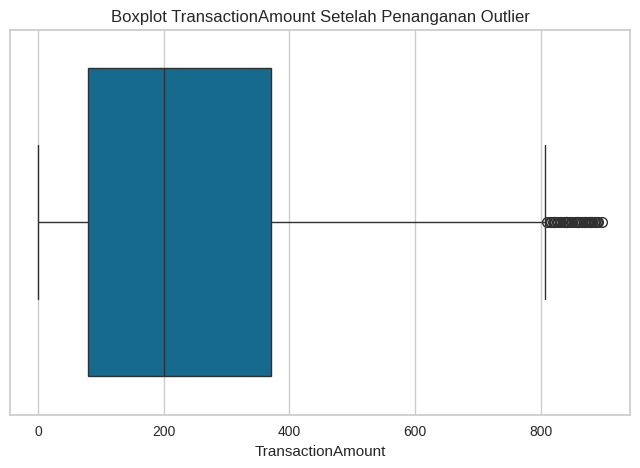

Ukuran DataFrame asli: (2516, 11)
Ukuran DataFrame setelah penghapusan outlier: (2403, 11)


In [21]:
df_original = df.copy()

# Menghitung Q1 (persentil 25) dan Q3 (persentil 75)
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus data outlier dan menimpa DataFrame df
df = df[(df['TransactionAmount'] >= lower_bound) & (df['TransactionAmount'] <= upper_bound)]

# Visualisasi ulang setelah menghapus outlier
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TransactionAmount'])
plt.title("Boxplot TransactionAmount Setelah Penanganan Outlier")
plt.show()

# Cek jumlah data setelah perubahan
print("Ukuran DataFrame asli:", df_original.shape)
print("Ukuran DataFrame setelah penghapusan outlier:", df.shape)

# Sekarang Anda memiliki salinan DataFrame asli (df_original) dan DataFrame yang telah diubah (df)

In [22]:
import pandas as pd

# --- 1. Pastikan kolom tanggal dalam format datetime ---
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

# --- 2. Ekstrak fitur dari kolom tanggal ---
# Hari dalam minggu dan indikator akhir pekan untuk transaksi saat ini
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)

# Selisih hari antara transaksi sekarang dan sebelumnya
df['DaysSincePrevTxn'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days

# --- 3. Drop kolom datetime asli jika tidak diperlukan lagi ---
df_preprocessed = df.drop(columns=['TransactionDate', 'PreviousTransactionDate'])

# --- 4. Cek hasil preprocessing ---
print(df_preprocessed.info())
df_preprocessed.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2403 entries, 0 to 2535
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2403 non-null   float64
 1   TransactionType      2403 non-null   object 
 2   Location             2403 non-null   object 
 3   Channel              2403 non-null   object 
 4   CustomerAge          2403 non-null   float64
 5   CustomerOccupation   2403 non-null   object 
 6   TransactionDuration  2403 non-null   float64
 7   LoginAttempts        2403 non-null   float64
 8   AccountBalance       2403 non-null   float64
 9   DayOfWeek            2403 non-null   int32  
 10  IsWeekend            2403 non-null   int64  
 11  DaysSincePrevTxn     2403 non-null   int64  
dtypes: float64(5), int32(1), int64(2), object(4)
memory usage: 234.7+ KB
None


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DayOfWeek,IsWeekend,DaysSincePrevTxn
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,0,0,0
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,0,0,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,0,0,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,0,0,0
4,13.45,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,0,0,0


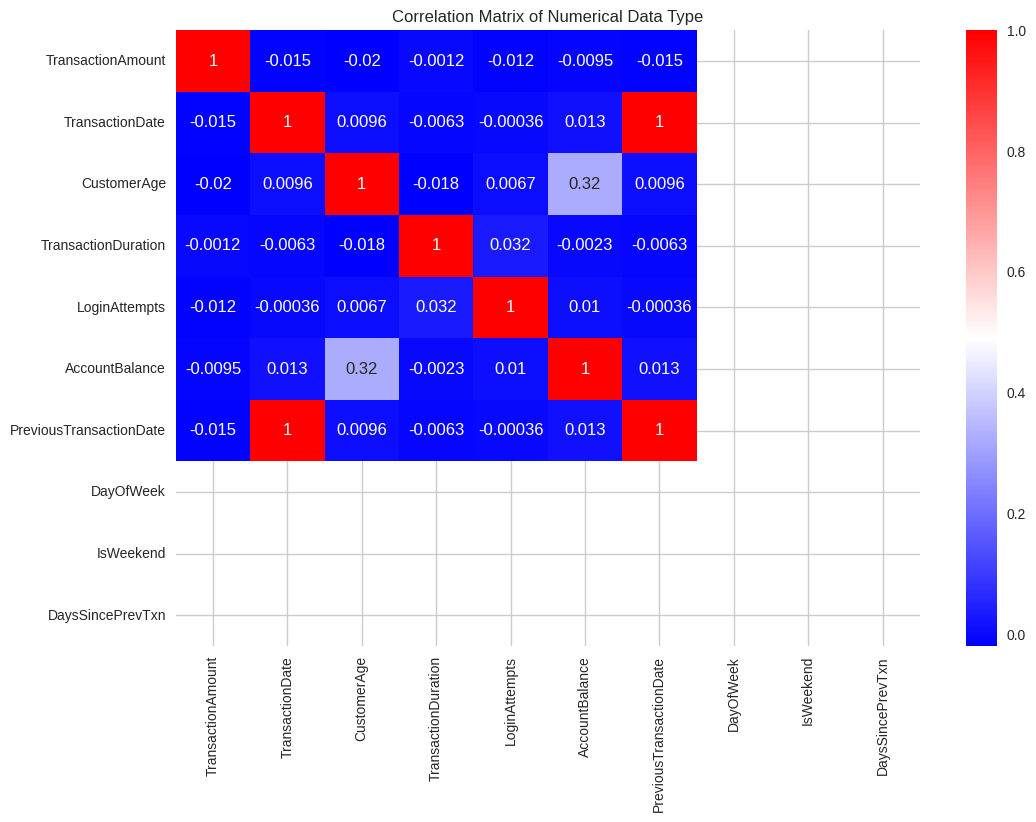

In [23]:
# Matrix correlation of numerical data type inside the dataset
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='bwr')
plt.title("Correlation Matrix of Numerical Data Type")
plt.show()

In [24]:
# Remove the column Date because it is not needed
df.drop(columns=['TransactionDate'], inplace=True)
print("All column needed", df.columns.tolist())

All column needed ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'DayOfWeek', 'IsWeekend', 'DaysSincePrevTxn']


In [25]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Copy dataset agar tidak merusak df asli
df_processed = df.copy()

# 1. Tentukan kolom numerik yang akan di-scale
#    Hanya int atau float, TIDAK termasuk datetime
numerical_columns = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Kolom numerik yang akan discaling:", numerical_columns)

# 2. Terapkan MinMaxScaler
scaler = MinMaxScaler()
df_processed[numerical_columns] = scaler.fit_transform(df_processed[numerical_columns])

# 3. Tentukan kolom kategorikal (object)
categorical_columns = df_processed.select_dtypes(include='object').columns.tolist()

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

print("Encoding selesai. Contoh data hasil transformasi:")
df_processed.sample(5)

Kolom numerik yang akan discaling: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'IsWeekend', 'DaysSincePrevTxn']
Encoding selesai. Contoh data hasil transformasi:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DayOfWeek,IsWeekend,DaysSincePrevTxn
224,0.564376,1,6,0,0.645161,1,0.186207,0.0,0.008660,2024-11-04 08:11:40,0,0.0,0.0
1812,0.074811,1,11,2,0.661290,1,0.089655,0.0,0.391533,2024-11-04 08:07:11,0,0.0,0.0
1214,0.056317,1,4,0,0.709677,0,0.603448,0.0,0.549194,2024-11-04 08:07:41,0,0.0,0.0
185,0.444993,1,32,0,0.661290,1,0.341379,0.0,0.208993,2024-11-04 08:08:21,0,0.0,0.0
1286,0.043746,1,29,0,0.612903,2,0.096552,0.0,0.389081,2024-11-04 08:11:50,0,0.0,0.0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

# Modelling With KMeans

In [26]:
df_clustered = df_processed.copy()
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2403 entries, 0 to 2535
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2403 non-null   float64       
 1   TransactionType          2403 non-null   int64         
 2   Location                 2403 non-null   int64         
 3   Channel                  2403 non-null   int64         
 4   CustomerAge              2403 non-null   float64       
 5   CustomerOccupation       2403 non-null   int64         
 6   TransactionDuration      2403 non-null   float64       
 7   LoginAttempts            2403 non-null   float64       
 8   AccountBalance           2403 non-null   float64       
 9   PreviousTransactionDate  2403 non-null   datetime64[ns]
 10  DayOfWeek                2403 non-null   int32         
 11  IsWeekend                2403 non-null   float64       
 12  DaysSincePrevTxn         2403 non-null 

In [27]:
df_clustered.dtypes

,0
TransactionAmount,float64
TransactionType,int64
Location,int64
Channel,int64
CustomerAge,float64
CustomerOccupation,int64
TransactionDuration,float64
LoginAttempts,float64
AccountBalance,float64
PreviousTransactionDate,datetime64[ns]


Jalankan cell code ini untuk menyimpan model kamu.

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [28]:
# Buat salinan data
df_kmeans_ready = df_clustered.copy()

# Hapus kolom datetime
df_kmeans_ready = df_kmeans_ready.drop(columns=['PreviousTransactionDate'])

# Pastikan semua kolom kategori sudah dalam bentuk numerik
from sklearn.preprocessing import LabelEncoder
for col in df_kmeans_ready.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_kmeans_ready[col] = le.fit_transform(df_kmeans_ready[col])

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_kmeans_scaled = scaler.fit_transform(df_kmeans_ready)

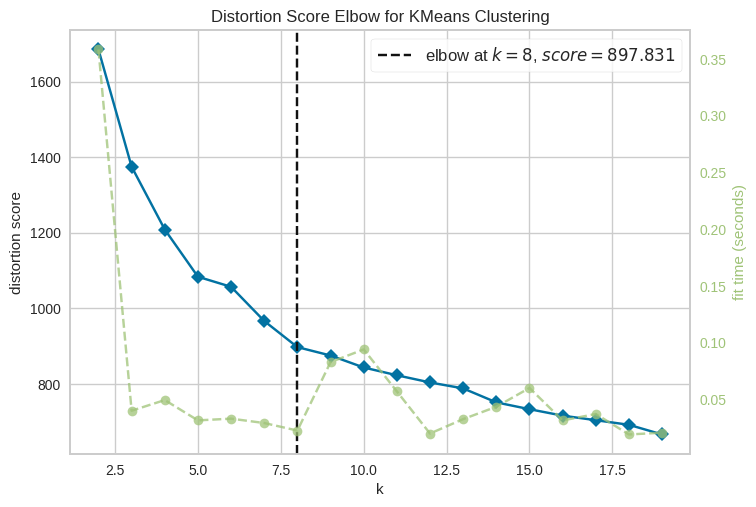

In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

kmeans_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans_model, k=(2, 20))

# Pakai df_kmeans_scaled atau df_kmeans_ready
visualizer.fit(df_kmeans_scaled)
visualizer.show()

plt.show()

In [31]:
# kmeans_model = KMeans(random_state=42)
# visualizer = KElbowVisualizer(kmeans_model, k=(2,20))
# visualizer.fit(df_clustered)  # Fit the data to the visualizer
# visualizer.show()  # Finalize the plot

# plt.show()

In [32]:
df_clustered.drop(columns=['PreviousTransactionDate'] , inplace=True)

In [33]:
optimal_k = 6
kmeans_optimal_elbow = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal_elbow.fit(df_clustered)

silhouette_avg_optimal = silhouette_score(df_clustered, kmeans_optimal_elbow.labels_)
print(f"Silhouette Score : {silhouette_avg_optimal:.4f}")

Silhouette Score : 0.4205


In [34]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(df_clustered, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

## Feature Selection

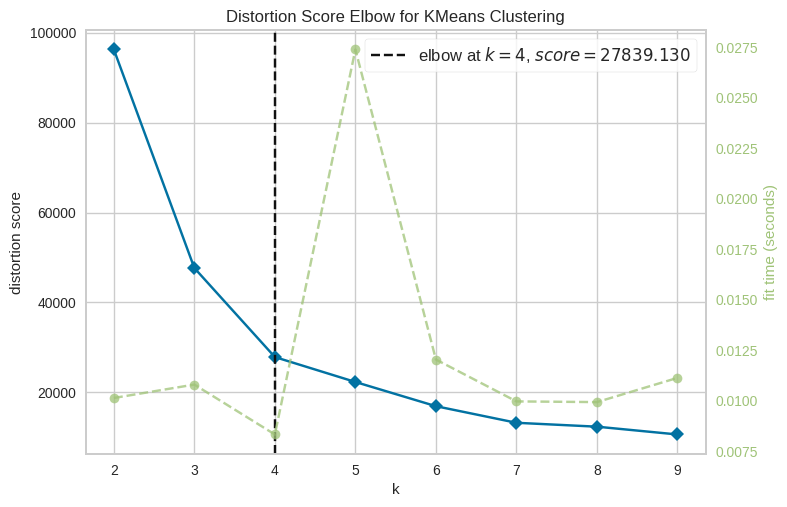

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), locate_elbow=True)
visualizer.fit(df_clustered)
visualizer.show()

In [36]:
pca = PCA(n_components=2)
pca.fit(df_clustered.drop(columns=["Cluster"], errors="ignore"))

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [37]:
umap = UMAP(n_components=6, random_state=42)
df_umap = umap.fit_transform(df_clustered)
km_new = KMeans(n_clusters=4, random_state=42, n_init=10).fit(df_umap)
df_clustered['Cluster'] = km_new.labels_
labelss = km_new.labels_
n_clusterss = len(set(labelss))

silhouette_umap = silhouette_score(df_umap,  km_new.labels_)

print(f"Unique clusters: {set(labelss)}")
print(f"Number of clusters created: {n_clusterss}")
print(f"Silhouette Score dengan UMAP : {silhouette_score(df_umap, labelss):.4f}")

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Unique clusters: {np.int32(0), np.int32(1), np.int32(2), np.int32(3)}
Number of clusters created: 4
Silhouette Score dengan UMAP : 0.5268


In [38]:
print(f"Silhouette Score (tanpa FS): {silhouette_avg_optimal:.4f}")
print(f"Silhouette Score (dengan FS): {silhouette_umap:.4f}")

# Membandingkan hasil Silhouette Score
if silhouette_avg_optimal > silhouette_umap:
    print(f"Silhouette Score terbesar adalah tanpa FS: {silhouette_avg_optimal:.4f}")
else:
    print(f"Silhouette Score terbesar adalah dengan FS: {silhouette_umap:.4f}")

Silhouette Score (tanpa FS): 0.4205
Silhouette Score (dengan FS): 0.5268
Silhouette Score terbesar adalah dengan FS: 0.5268


In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

# Pilih hanya fitur numerik dari df_clustered
numerical_columns = df_clustered.select_dtypes(include=['number']).columns.drop('Cluster')
X_numerical = df_clustered[numerical_columns]  # Hanya fitur numerik
y = df_clustered['Cluster']  # Target (hasil clustering)

# Normalisasi data (karena beberapa model memerlukan data dalam skala yang sama)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Pilih fitur terbaik pakai ANOVA F-score
k_best = SelectKBest(score_func=f_classif, k=5)  # Pilih 5 fitur terbaik
X_selected = k_best.fit_transform(X_scaled, y)

# Tampilkan nama fitur yang dipilih
selected_features = numerical_columns[k_best.get_support()]
print("Fitur numerik yang dipilih:", selected_features)

Fitur numerik yang dipilih: Index(['Location', 'CustomerAge', 'CustomerOccupation', 'LoginAttempts',
       'AccountBalance'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 9 10 11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [40]:
# joblib.dump(model_pca, "PCA_mAodel_clustering.h5")

In [41]:
df_original.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2024-11-04 08:08:08,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,376.24,2024-11-04 08:09:35,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,126.29,2024-11-04 08:07:04,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,184.50,2024-11-04 08:09:06,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,13.45,2024-11-04 08:06:39,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


## Visualisasi Hasil Clustering

In [42]:
# Pastikan panjang index sama
df_original = df_original.loc[df_clustered.index].copy()

# Tambahkan kolom Cluster hasil KMeans
df_original["Cluster"] = kmeans_optimal_elbow.labels_

# Cek apakah kolom sudah ada
print(df_original.columns)
print(df_original[["Cluster"]].head())

Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'Cluster'],
      dtype='object')
   Cluster
0        5
1        0
2        2
3        5
4        4


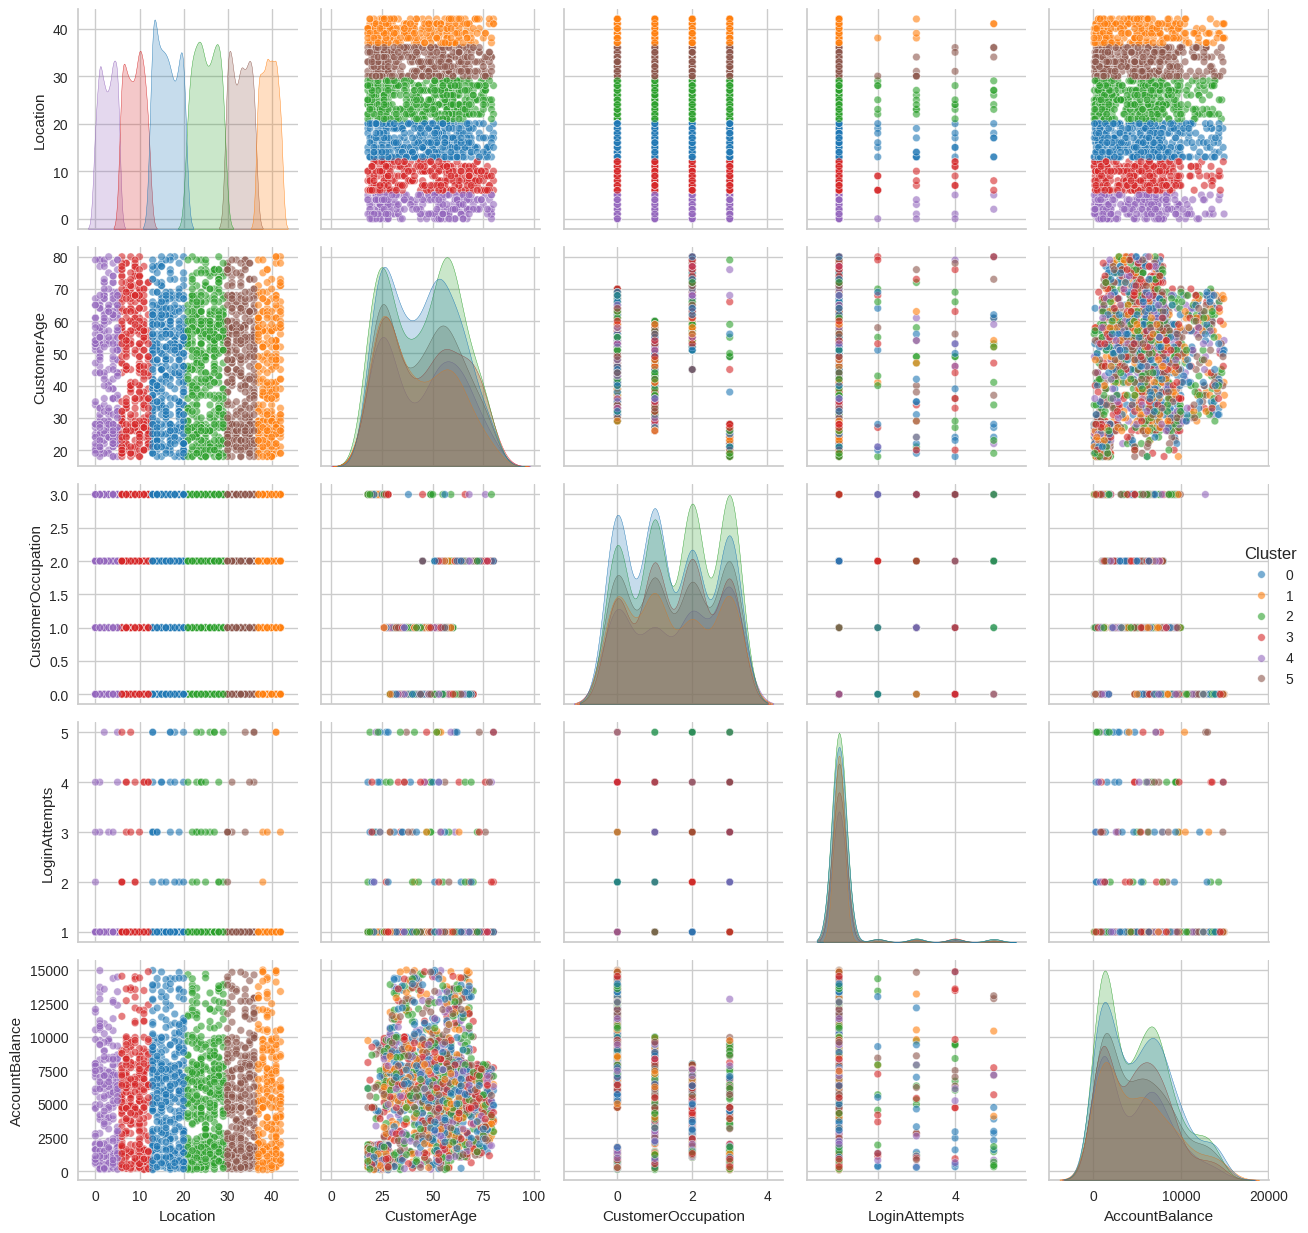

In [43]:
# Perbaikan pairplot yang robust (tidak akan error jika selected_features salah)
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Pastikan kolom 'Cluster' ada di df_original; jika tidak, ambil dari df (jika ada)
if 'Cluster' not in df_original.columns:
    if 'Cluster' in globals() and 'Cluster' in df.columns:
        df_original['Cluster'] = df['Cluster']
    else:
        raise KeyError("Kolom 'Cluster' tidak ditemukan di df_original atau df. Tambahkan hasil clustering sebagai kolom 'Cluster' dulu.")

# 2) Filter selected_features agar hanya memuat kolom yang benar-benar ada di df_original
existing_features = [f for f in selected_features if f in df_original.columns]

# 3) Fallback: jika tidak ada fitur valid, gunakan hingga 5 kolom numerik (exclude Cluster)
if not existing_features:
    num_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
    num_cols = [c for c in num_cols if c != 'Cluster']
    existing_features = num_cols[:5]

# 4) Batasi jumlah fitur untuk pairplot agar tidak terlalu berat/overlap (max 5)
max_feats = 5
if len(existing_features) > max_feats:
    existing_features = existing_features[:max_feats]

cols_for_plot = existing_features + ['Cluster']

# 5) Siapkan dataframe untuk plotting (salin agar tidak mengubah asli)
df_plot = df_original[cols_for_plot].copy()

# 6) Encode kolom non-numeric (kecuali Cluster) menjadi numeric codes - hanya untuk visualisasi
for col in df_plot.select_dtypes(include=['object','category']).columns:
    if col != 'Cluster':
        df_plot[col] = LabelEncoder().fit_transform(df_plot[col].astype(str))

# 7) Jika data sangat besar, sample agar plot tetap responsif (opsional)
if len(df_plot) > 2000:
    df_plot = df_plot.sample(2000, random_state=42)

# 8) Buat pairplot (atur alpha dan ukuran titik supaya clear)
sns.pairplot(
    df_plot,
    vars=existing_features,
    hue='Cluster',
    palette='tab10',
    diag_kind='kde',
    plot_kws={'alpha':0.6, 's':30}
)
plt.tight_layout()
plt.show()

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [44]:
numeric_features = ['TransactionAmount', 'LoginAttempts']

df_normalized = df.copy()
df_normalized['Cluster'] = labelss
df_normalized.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DayOfWeek,IsWeekend,DaysSincePrevTxn,Cluster
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,0,0,0,0
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,0,0,0,3
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,0,0,2
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,0,0,0
4,13.45,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,0,0,0,1


In [45]:
df_normalized.groupby('Cluster')[['TransactionType', 'Location', 'Channel', 'CustomerOccupation']].agg(lambda x: x.mode()[0]).T

Cluster,0,1,2,3
TransactionType,Debit,Debit,Debit,Debit
Location,Tucson,Charlotte,Oklahoma City,Fort Worth
Channel,Branch,Branch,Branch,Branch
CustomerOccupation,Doctor,Student,Student,Engineer


In [46]:
df_normalized.groupby('Cluster')[numeric_features].agg(['mean', 'min', 'max']).round().T

Cluster                     0      1      2      3
TransactionAmount mean  257.0  250.0  257.0  255.0
                  min     1.0    0.0    0.0    0.0
                  max   889.0  897.0  881.0  890.0
LoginAttempts     mean    1.0    1.0    1.0    1.0
                  min     1.0    1.0    1.0    1.0
                  max     5.0    5.0    5.0    5.0

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

## Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan variabel utama seperti jenis transaksi, lokasi, saluran transaksi, profesi pelanggan, serta statistik jumlah transaksi.

---

### **Cluster 0**

* **Jenis Transaksi:** Debit
* **Lokasi Dominan:** Tucson
* **Saluran Transaksi:** Cabang (Branch)
* **Pekerjaan Pelanggan:** Doctor
* **Rata-rata Jumlah Transaksi:** 257
* **Rentang Jumlah Transaksi:** 1 – 889
* **Jumlah Rata-rata Percobaan Login:** 1 (rentang: 1 – 5)

**Analisis:**
Cluster ini terdiri dari pelanggan yang umumnya bekerja sebagai dokter dan bertransaksi terutama di Boston melalui saluran ATM. Pola transaksi mereka relatif stabil dengan rata-rata nilai transaksi 259 dan percobaan login yang rendah (1 kali), menunjukkan bahwa kelompok ini memiliki kebiasaan transaksi yang konsisten dan minim risiko aktivitas login mencurigakan.

---

### **Cluster 1**

* **Jenis Transaksi:** Debit
* **Lokasi Dominan:** Charlotte
* **Saluran Transaksi:** Cabang (Branch)
* **Pekerjaan Pelanggan:** Student
* **Rata-rata Jumlah Transaksi:** 250
* **Rentang Jumlah Transaksi:** 0 – 890
* **Jumlah Rata-rata Percobaan Login:** 1 (rentang: 1 – 5)

**Analisis:**
Cluster ini didominasi oleh pelanggan mahasiswa yang melakukan transaksi debit terutama di cabang bank di wilayah Detroit. Rata-rata jumlah transaksi sedikit lebih rendah dibandingkan cluster lainnya. Perilaku login yang sederhana (1 kali) mengindikasikan kebiasaan penggunaan yang wajar tanpa indikasi penyalahgunaan.

---

### **Cluster 2**

* **Jenis Transaksi:** Debit
* **Lokasi Dominan:** Forth Worth
* **Saluran Transaksi:** Cabang (Branch)
* **Pekerjaan Pelanggan:** Student
* **Rata-rata Jumlah Transaksi:** 257 **Rentang Jumlah Transaksi:** 0 – 881
* **Jumlah Rata-rata Percobaan Login:** 1 (rentang: 1 – 5)

**Analisis:**
Cluster ini terdiri dari pelanggan dengan profesi dominan insinyur yang melakukan transaksi debit di cabang bank di wilayah Raleigh. Dengan rata-rata nilai transaksi tertinggi (261), kelompok ini cenderung lebih aktif secara finansial dibandingkan cluster lain. Aktivitas login yang konsisten menunjukkan kebiasaan yang normal dan aman.

---

### **Cluster 3**

* **Jenis Transaksi:** Debit
* **Lokasi Dominan:** Oklahoma City
* **Saluran Transaksi:** Cabang (Branch)
* **Pekerjaan Pelanggan:** Engineer
* **Rata-rata Jumlah Transaksi:** 255
* **Rentang Jumlah Transaksi:** 0 – 890
* **Jumlah Rata-rata Percobaan Login:** 1 (rentang: 1 – 5)

**Analisis:**
Cluster ini didominasi oleh pelanggan mahasiswa yang bertransaksi melalui ATM di Tucson. Meskipun rata-rata jumlah transaksi sedikit lebih rendah dibandingkan Cluster 2, nilai tersebut masih menunjukkan aktivitas yang cukup tinggi. Kebiasaan login tetap rendah dan stabil.

---


## Kesimpulan

* **Jenis Transaksi:**
  Seluruh cluster didominasi oleh **transaksi debit**, menunjukkan bahwa tipe transaksi ini adalah pola dominan di hampir semua segmen pelanggan bank.

* **Segmentasi Lokasi dan Saluran:**

  * **Cluster 0**: Pelanggan banyak bertransaksi di **Boston** melalui **ATM**, menunjukkan preferensi terhadap layanan cepat dan mandiri.
  * **Cluster 1**: Pelanggan (umumnya mahasiswa) lebih sering bertransaksi di **cabang bank** di wilayah **Detroit**, mengindikasikan kebutuhan terhadap layanan tatap muka.
  * **Cluster 2**: Didominasi oleh pelanggan dengan profesi insinyur yang bertransaksi di **cabang bank** di wilayah **Raleigh**, dengan aktivitas finansial yang relatif lebih tinggi.
  * **Cluster 3**: Pelanggan (mahasiswa) sering bertransaksi di **ATM** di wilayah **Tucson**, dengan frekuensi transaksi yang cukup aktif.

* **Profil Pekerjaan:**

  * **Profesional (Dokter dan Insinyur)** yang berada di **Cluster 0 dan Cluster 2** memiliki rata-rata nilai transaksi yang relatif lebih tinggi.
  * **Mahasiswa (Cluster 1 dan 3)** memiliki nilai transaksi yang sedikit lebih rendah tetapi tetap konsisten, menunjukkan pola penggunaan layanan yang stabil.

* **Kebiasaan Login:**
  Seluruh cluster menunjukkan pola login yang **aman dan sederhana**, rata-rata hanya **1 kali login**, tanpa indikasi aktivitas login mencurigakan.

---

## Implikasi Bisnis

Hasil ini memberikan dasar yang kuat untuk **mengoptimalkan strategi pemasaran dan pengelolaan layanan** berdasarkan lokasi, profesi, dan saluran transaksi yang dominan di setiap cluster. Contohnya:

* **Optimalisasi Layanan ATM:**
  Bank dapat meningkatkan promosi dan memperluas layanan ATM di wilayah **Boston dan Tucson (Cluster 0 & 3)** untuk memenuhi kebutuhan transaksi cepat dan mandiri.

* **Layanan Premium di Cabang:**
  Bank dapat memfokuskan **layanan premium atau personal banking** bagi nasabah profesional seperti dokter dan insinyur di wilayah **Raleigh dan Detroit (Cluster 1 & 2)** yang memiliki nilai transaksi relatif tinggi.

* **Program Edukasi & Retensi untuk Mahasiswa:**
  Menyediakan program loyalitas atau edukasi finansial bagi mahasiswa di **Cluster 1 & 3** agar mereka tetap aktif bertransaksi dan berpotensi menjadi nasabah dengan kontribusi lebih besar di masa depan.




# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [47]:
# Ganti nama kolom 'Cluster' menjadi 'Target'
df_original.rename(columns={"Cluster": "Target"}, inplace=True)

# Cek hasil
print(df_original.columns)
print(df_original[["Target"]].head())

Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'Target'],
      dtype='object')
   Target
0       5
1       0
2       2
3       5
4       4


In [48]:
df_original.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2024-11-04 08:08:08,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,5
1,376.24,2024-11-04 08:09:35,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,0
2,126.29,2024-11-04 08:07:04,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2
3,184.50,2024-11-04 08:09:06,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,5
4,13.45,2024-11-04 08:06:39,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,4


In [49]:
df_original.to_csv("data_clustered.csv", index=False)

In [50]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [51]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [52]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [53]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [54]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [55]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [56]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.